## Image augmentation

### rule based image augmentation

TODO : 어떤 종류의 data augmentation 방식을 채택할 것인지..!

In [29]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa

ia.seed(1)

# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
images = np.array(
    [ia.quokka(size=(64, 64)) for _ in range(32)],
    dtype=np.uint8
)

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order

images_aug = seq(images=images)

/home/sangwook/anaconda3/envs/torch/lib/python3.6/site-packages/imgaug/imgaug.py:182: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


In [30]:
# concatenate 하는 방법
np.vstack([images, images_aug]).shape

(64, 64, 64, 3)

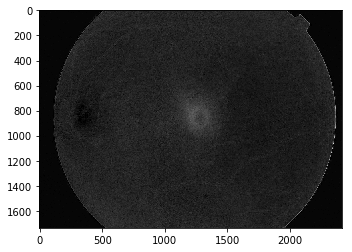

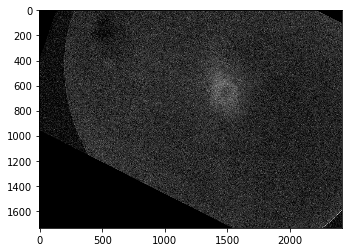

In [32]:
train_csv_file = '/media/sangwook/MGTEC/blindness_detection_data/2019/train_2019.csv'
image_folder = '/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/'

import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

train_csv = pd.read_csv(train_csv_file)

label = 1
ratio = 0.5

ids  = list(train_csv[train_csv['diagnosis'] == label]['id_code'])

for index, id_ in enumerate(ids):
    
    image_name = id_ + '.png'
    
    image_arr = cv2.imread(os.path.join(image_folder, image_name))
    image_arr = image_arr.transpose((2, 0, 1))
    
    augmented_image = seq(images = image_arr)
    
    plt.imshow(image_arr[0], cmap='gray')
    plt.show()
    
    plt.imshow(augmented_image[0], cmap='gray')
    plt.show()
    
    break

In [37]:
# Move files into labels
from shutil import copy

root_folder = '/media/sangwook/MGTEC/blindness_detection_data/2019/'
errors = []

for label in range(5):
    if not os.path.exists(os.path.join(root_folder, str(label))):
        os.mkdir(os.path.join(root_folder, str(label)))
    
    ids  = list(train_csv[train_csv['diagnosis'] == label]['id_code'])
    
    for id_ in ids:
        
        image_name = id_ + '.png'
        
        src = os.path.join(image_folder, image_name)
        dst = os.path.join(root_folder, str(label), image_name)
        
        try:
            copy(src, dst)
        except:
            errors.append(src)
        
        print(src, dst)
    
print(errors)

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/002c21358ce6.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/002c21358ce6.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/005b95c28852.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/005b95c28852.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/0097f532ac9f.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/0097f532ac9f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/00cc2b75cddd.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/00cc2b75cddd.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/00f6c1be5a33.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/00f6c1be5a33.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/0125fbd2e791.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/0125fbd2e791.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/014508ccb9cb.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/0924cec998fa.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/0924cec998fa.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/093cf723fede.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/093cf723fede.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/096436d68d06.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/096436d68d06.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/09662e462531.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/09662e462531.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/099021fac3c9.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/099021fac3c9.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/09934421c79e.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/09934421c79e.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/09c8323c612e.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/10a5026eb8e6.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/10a5026eb8e6.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/10bf25731c08.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/10bf25731c08.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/10de500cf0c5.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/10de500cf0c5.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/10f10fd30718.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/10f10fd30718.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/10f6ef37fe43.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/10f6ef37fe43.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/11b220a397b8.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/11b220a397b8.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/11d8e5eaee5b.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/19545647508e.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/19545647508e.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/197af0de76e2.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/197af0de76e2.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/19b0e3c734f5.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/19b0e3c734f5.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/1a0dbc6c0cda.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/1a0dbc6c0cda.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/1a19f2ef4472.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/1a19f2ef4472.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/1a1e974a7dbf.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/1a1e974a7dbf.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/1ab8d3431ffc.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/20f86e068276.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/20f86e068276.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/21037f5c7790.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/21037f5c7790.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/210bfe0127c6.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/210bfe0127c6.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/215d2b7c3fde.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/215d2b7c3fde.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/218c822a3dd9.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/218c822a3dd9.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/2209daf71aab.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/2209daf71aab.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/2221cf5c7935.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/30263a7d5609.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/30263a7d5609.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/306c841af3fc.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/306c841af3fc.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/3079490a4b9c.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/3079490a4b9c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/30db694bee42.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/30db694bee42.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/3132556f5352.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/3132556f5352.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/31360e44ac64.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/31360e44ac64.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/315c1a0d87fd.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/384db24ebbd7.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/384db24ebbd7.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/384e6c915722.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/384e6c915722.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/387138ddf43d.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/387138ddf43d.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/388279491b5d.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/388279491b5d.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/389552047476.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/389552047476.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/38c7153457e2.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/38c7153457e2.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/38f1901f214a.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/415f2d2bd2a1.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/415f2d2bd2a1.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/41960d5f58c2.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/41960d5f58c2.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/41ab357d103f.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/41ab357d103f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4205e9deb058.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/4205e9deb058.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4210809074c1.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/4210809074c1.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4276b82e4489.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/4276b82e4489.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/42985aa2e32f.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4958bfcc9f38.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/4958bfcc9f38.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/496155f71d0a.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/496155f71d0a.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4982378d72f9.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/4982378d72f9.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/49e4b95ee2dc.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/49e4b95ee2dc.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/49eb73968c44.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/49eb73968c44.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4a05f81b3aba.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/4a05f81b3aba.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4a1afe4044f4.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/500aad15b7c8.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/500aad15b7c8.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/501c319f7a9f.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/501c319f7a9f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/504a69096fcb.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/504a69096fcb.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5056fa7d505f.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/5056fa7d505f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5069feccd866.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/5069feccd866.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5077cdb88aed.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/5077cdb88aed.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5078caaf1f57.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/57a710de68a4.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/57a710de68a4.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/57db4781e7ec.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/57db4781e7ec.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/57f5ad4b5b29.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/57f5ad4b5b29.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/58059e73d2d4.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/58059e73d2d4.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5814cbd2e9bf.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/5814cbd2e9bf.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/586f5c56081e.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/586f5c56081e.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5889a0c75cac.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5ead17e894ae.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/5ead17e894ae.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5eb8fb1aad41.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/5eb8fb1aad41.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5f4a8c074bd5.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/5f4a8c074bd5.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5f51192841f7.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/5f51192841f7.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5f6db235c04d.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/5f6db235c04d.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5fcff7280019.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/5fcff7280019.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/606daaf0bfc7.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/6852f4531591.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/6852f4531591.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/68987fb159ab.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/68987fb159ab.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/68ddb15a74de.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/68ddb15a74de.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/691eeb59b4cb.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/691eeb59b4cb.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/692e946b1f85.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/692e946b1f85.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/6966abf40b8c.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/6966abf40b8c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/69b3a00927fc.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/6fe4751a3b42.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/6fe4751a3b42.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/6fe67fd7f5d1.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/6fe67fd7f5d1.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/705f508d1e42.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/705f508d1e42.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/70d0392397de.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/70d0392397de.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/7131bf4c9e6f.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/7131bf4c9e6f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/7179f85bfd6f.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/7179f85bfd6f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/71c22da3d6c6.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/780be525036d.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/780be525036d.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/780f9c237c56.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/780f9c237c56.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/780f9daaa24b.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/780f9daaa24b.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/7828dd083cdc.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/7828dd083cdc.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/7831ce1d895e.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/7831ce1d895e.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/784d6d302f98.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/784d6d302f98.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/78937523f7a8.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/7f2cce721e19.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/7f2cce721e19.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/7f39c36469b5.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/7f39c36469b5.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/7f43becd3e83.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/7f43becd3e83.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/7f6690fa390a.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/7f6690fa390a.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/7fc3a8bb40de.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/7fc3a8bb40de.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/7fdb177b8f7d.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/7fdb177b8f7d.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/7fe7309d0b4f.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/870f433e8f37.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/870f433e8f37.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/870fbe6eaa68.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/870fbe6eaa68.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/87295c5fa1cc.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/87295c5fa1cc.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/874f8c1929f6.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/874f8c1929f6.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/875d2ffcbf47.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/875d2ffcbf47.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/876deb29f000.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/876deb29f000.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/878e356c8fc9.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/8e7981855125.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/8e7981855125.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/8ead17dfb6a6.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/8ead17dfb6a6.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/8ead8f37423c.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/8ead8f37423c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/8ed586c43023.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/8ed586c43023.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/8ee50c26fc13.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/8ee50c26fc13.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/8f06ca4642bd.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/8f06ca4642bd.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/8f10e41a2f02.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/962c0fc85e13.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/962c0fc85e13.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/966c07831334.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/966c07831334.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/96793edb1003.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/96793edb1003.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/9688c6ef5dc5.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/9688c6ef5dc5.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/969f92a390db.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/969f92a390db.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/96b5474ae604.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/96b5474ae604.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/96c699221180.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/9ce46d400cd6.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/9ce46d400cd6.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/9cf7c1349673.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/9cf7c1349673.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/9d1feed37610.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/9d1feed37610.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/9d62478042b6.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/9d62478042b6.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/9d75de31f1b8.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/9d75de31f1b8.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/9de9421f17e3.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/9de9421f17e3.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/9e2058917304.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/a484bdf85b4c.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/a484bdf85b4c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/a4ee03ecff60.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/a4ee03ecff60.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/a528be013a04.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/a528be013a04.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/a53d6d2472a6.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/a53d6d2472a6.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/a5bb85afc6e8.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/a5bb85afc6e8.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/a61723fc38c2.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/a61723fc38c2.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/a627eb8c08c5.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/aafe980edd0c.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/aafe980edd0c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ab03d50bba2f.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/ab03d50bba2f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ab32db41c409.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/ab32db41c409.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ab3c505b624f.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/ab3c505b624f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ab653b8554c0.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/ab653b8554c0.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ab686895533e.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/ab686895533e.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ab724603ee93.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b09101adb478.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/b09101adb478.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b0acd3593310.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/b0acd3593310.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b0b3b16fc305.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/b0b3b16fc305.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b0c9a492e068.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/b0c9a492e068.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b0f0fa677d5f.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/b0f0fa677d5f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b0f8613305a3.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/b0f8613305a3.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b10fca20c885.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b82dfa63a75f.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/b82dfa63a75f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b835b6e31a59.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/b835b6e31a59.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b842b43cb7fb.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/b842b43cb7fb.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b86fb2d5be1a.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/b86fb2d5be1a.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b8dab47a260e.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/b8dab47a260e.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b8e20c076b03.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/b8e20c076b03.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b8e9a8f4617d.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/bf87aedf2489.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/bf87aedf2489.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/bfa30ebf63a8.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/bfa30ebf63a8.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/bfb578c0e8d8.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/bfb578c0e8d8.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/bff51afc76d4.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/bff51afc76d4.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/bffca6eeb2bf.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/bffca6eeb2bf.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/c013e869acce.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/c013e869acce.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/c06024f05a16.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/c85b79d70079.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/c85b79d70079.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/c90c6b94cf40.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/c90c6b94cf40.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/c947bb6cf9f6.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/c947bb6cf9f6.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/c94f37085d0f.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/c94f37085d0f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/c97472ef2c66.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/c97472ef2c66.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/c98f623d08d1.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/c98f623d08d1.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/c9c563864ab1.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d1afdb8cf70d.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/d1afdb8cf70d.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d1b279cc02ae.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/d1b279cc02ae.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d1ca85af57c9.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/d1ca85af57c9.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d1cf31577a59.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/d1cf31577a59.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d1f7ea924a01.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/d1f7ea924a01.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d1fa0f744620.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/d1fa0f744620.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d26bb2ed6e71.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d865997a6280.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/d865997a6280.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d866c26d76f0.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/d866c26d76f0.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d871895742b1.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/d871895742b1.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d881c04f01fe.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/d881c04f01fe.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d88c4843aec3.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/d88c4843aec3.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d8da9de62743.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/d8da9de62743.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d911dd40c63b.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/df6d13d04da1.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/df6d13d04da1.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/df9cb3729eb1.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/df9cb3729eb1.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/dfc7ec7db0e0.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/dfc7ec7db0e0.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/dfea19863428.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/dfea19863428.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e01b7bac822b.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/e01b7bac822b.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e0313be77035.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/e0313be77035.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e03a74e7d74f.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e66ad813a508.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/e66ad813a508.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e68746d426b2.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/e68746d426b2.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e68bdd36e589.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/e68bdd36e589.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e69b48516577.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/e69b48516577.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e6a5e4718873.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/e6a5e4718873.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e7291472109b.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/e7291472109b.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e7578d8dba72.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ee3f5cf52188.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/ee3f5cf52188.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ee3fe7809e6a.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/ee3fe7809e6a.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ee77763a6afb.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/ee77763a6afb.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/eeaea2c5ff34.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/eeaea2c5ff34.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/eebd1e195952.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/eebd1e195952.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/eedae6b28f96.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/eedae6b28f96.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ef247f28004f.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f56ff0440ed1.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/f56ff0440ed1.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f5733f77273d.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/f5733f77273d.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f57cf3b6f48e.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/f57cf3b6f48e.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f580566e27f5.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/f580566e27f5.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f58cdfa968be.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/f58cdfa968be.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f58f0b2fd718.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/f58f0b2fd718.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f5c953bee7cd.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fd0a70082e7c.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/fd0a70082e7c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fd4c946c52bf.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/fd4c946c52bf.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fd87b6b2e664.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/fd87b6b2e664.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fdbc252813b1.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/fdbc252813b1.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fdc685055659.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/fdc685055659.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fe06dad6851c.png /media/sangwook/MGTEC/blindness_detection_data/2019/0/fe06dad6851c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fe0e2dee1834.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/17eff993386f.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/17eff993386f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/18b06f56ab27.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/18b06f56ab27.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/194814669fee.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/194814669fee.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/19722bff5a09.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/19722bff5a09.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/19e350c7c83c.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/19e350c7c83c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/1a03a7970337.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/1a03a7970337.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/1b329a127307.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/3de8ad4151e1.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/3de8ad4151e1.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/3ee17aa12e46.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/3ee17aa12e46.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/3f73c91b7e32.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/3f73c91b7e32.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4029d70e9d8a.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/4029d70e9d8a.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/40e9b5630438.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/40e9b5630438.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4393c5bc576a.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/4393c5bc576a.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/45e4b7eada54.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5a091e8cd95c.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/5a091e8cd95c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5b068765e846.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/5b068765e846.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5b0e53f53ef3.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/5b0e53f53ef3.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5b72ff04333d.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/5b72ff04333d.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5b804948e35f.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/5b804948e35f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5cab3ef4b31c.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/5cab3ef4b31c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5efa24b03d5e.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/8114d6a160df.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/8114d6a160df.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/821789e9053f.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/821789e9053f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/8273fdb4405e.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/8273fdb4405e.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/82ac8463fadd.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/82ac8463fadd.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/83e529e95b0e.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/83e529e95b0e.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/849a91e9ab28.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/849a91e9ab28.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/84a72e15b23c.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/a95858e052d6.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/a95858e052d6.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ababe19ed448.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/ababe19ed448.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/abdb365cacbc.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/abdb365cacbc.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ad1f7445b1a8.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/ad1f7445b1a8.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ad3fc5076852.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/ad3fc5076852.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ae8472f8d310.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/ae8472f8d310.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/af133a85ea0c.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/cb2f3c5d71a7.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/cb2f3c5d71a7.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/cc12453ea915.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/cc12453ea915.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/cc9270f06b65.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/cc9270f06b65.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/cd45bfa07d41.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/cd45bfa07d41.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/cd5714db652d.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/cd5714db652d.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/cf0575534cec.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/cf0575534cec.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/cf603a9ef2d5.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fd62bd0db4f1.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/fd62bd0db4f1.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fdd18ccbbdc5.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/fdd18ccbbdc5.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fe2df69676cf.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/fe2df69676cf.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fe674c2f73f5.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/fe674c2f73f5.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fea14b3d44b0.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/fea14b3d44b0.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fecf4c5ae84b.png /media/sangwook/MGTEC/blindness_detection_data/2019/1/fecf4c5ae84b.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/000c1434d8d7.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/1006345f70b7.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/1006345f70b7.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/10ecc5292ab1.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/10ecc5292ab1.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/10eefba568dd.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/10eefba568dd.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/1120f6d08d95.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/1120f6d08d95.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/1124ffcd76c2.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/1124ffcd76c2.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/115e42dd6a81.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/115e42dd6a81.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/1177d583c807.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/203275daf46d.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/203275daf46d.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/20404ec7b518.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/20404ec7b518.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/20688cb25704.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/20688cb25704.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/207a580de0ea.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/207a580de0ea.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/20c883d3bd38.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/20c883d3bd38.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/2131aa3a1e6f.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/2131aa3a1e6f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/217dad18a5ed.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/300305ce82d2.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/300305ce82d2.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/302bcdb635ff.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/302bcdb635ff.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/308f7fce6f0d.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/308f7fce6f0d.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/310c27067ac0.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/310c27067ac0.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/3128eb593012.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/3128eb593012.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/31452ad8808c.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/31452ad8808c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/314862758acf.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/3ffa14d60b24.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/3ffa14d60b24.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/40140a925c43.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/40140a925c43.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/40527a5e95dd.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/40527a5e95dd.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/417f408ee8e0.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/417f408ee8e0.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4189d4e631ec.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/4189d4e631ec.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/419406328dcd.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/419406328dcd.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/423abbaa5fad.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4a44cc840ebe.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/4a44cc840ebe.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4a558a1cd243.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/4a558a1cd243.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4ad6109706e8.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/4ad6109706e8.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4b1001050f1d.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/4b1001050f1d.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4b422b48d0d4.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/4b422b48d0d4.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4b5ffea77373.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/4b5ffea77373.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/4c52922f3bfd.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/56e56aa08362.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/56e56aa08362.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5723d0ec895e.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/5723d0ec895e.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/57469423a012.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/57469423a012.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/57760be09c03.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/57760be09c03.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/57a5f1015504.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/57a5f1015504.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/57ce57a8cfb0.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/57ce57a8cfb0.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/57f933d3d7c7.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/6666c4f18396.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/6666c4f18396.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/668e853258cd.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/668e853258cd.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/66bae1ba227f.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/66bae1ba227f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/66d2ca47aa44.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/66d2ca47aa44.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/6733544ae7a6.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/6733544ae7a6.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/674057ab250c.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/674057ab250c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/67844c46bc61.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/7743f4e04a6d.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/7743f4e04a6d.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/77543f66a84a.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/77543f66a84a.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/77baa08a1345.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/77baa08a1345.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/77e7c7a160c8.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/77e7c7a160c8.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/77f69c7ff324.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/77f69c7ff324.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/7877be80901c.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/7877be80901c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/78a577c3e0bf.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/86baef833ae0.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/86baef833ae0.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/86e7f98f73f1.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/86e7f98f73f1.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/86fbac86ed3e.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/86fbac86ed3e.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/873fe0404d6e.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/873fe0404d6e.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/876e1dd12d38.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/876e1dd12d38.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/878a3a097436.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/878a3a097436.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/879744b9dc65.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/94dcb491143f.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/94dcb491143f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/9568eb7e9c08.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/9568eb7e9c08.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/959dc602febc.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/959dc602febc.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/962cf85e4f6d.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/962cf85e4f6d.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/96c3e3db68bc.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/96c3e3db68bc.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/96d48b073f18.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/96d48b073f18.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/975252e325e3.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/a150ff5dfe07.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/a150ff5dfe07.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/a15470303941.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/a15470303941.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/a15590a7d774.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/a15590a7d774.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/a15652b22ab8.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/a15652b22ab8.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/a19507501b40.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/a19507501b40.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/a1b12fdce6c3.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/a1b12fdce6c3.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/a21b37719f9b.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/abf09c44d5f4.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/abf09c44d5f4.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/abf0f56c6f12.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/abf0f56c6f12.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ac2c814949f9.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/ac2c814949f9.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ac5b5dddf91b.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/ac5b5dddf91b.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ac720570dd0f.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/ac720570dd0f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/aca88f566228.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/aca88f566228.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/acc9f29538c4.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b99c825b93c5.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/b99c825b93c5.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b9b6ee2b9453.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/b9b6ee2b9453.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ba25f947f4ec.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/ba25f947f4ec.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ba2624883599.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/ba2624883599.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/bb733062f494.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/bb733062f494.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/bc23f74e14dd.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/bc23f74e14dd.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/bca2bdc15fc5.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/c9d42d7534e0.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/c9d42d7534e0.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/c9f0dc2c8b43.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/c9f0dc2c8b43.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ca0f1a17c8e5.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/ca0f1a17c8e5.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ca360bec5851.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/ca360bec5851.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ca7570c5925c.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/ca7570c5925c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ca7f5caddf96.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/ca7f5caddf96.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ca891d37a43c.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d8404680bba6.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/d8404680bba6.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d85a842d20bd.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/d85a842d20bd.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d88806d9ece9.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/d88806d9ece9.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d8cdb7d7283a.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/d8cdb7d7283a.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d91273efb92a.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/d91273efb92a.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d9311f7497cb.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/d9311f7497cb.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/d94e10f42861.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e4e343eaae2a.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/e4e343eaae2a.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e540d2e35d15.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/e540d2e35d15.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e599151ca14b.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/e599151ca14b.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e5d56f4f359b.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/e5d56f4f359b.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e65a2ff90494.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/e65a2ff90494.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e65f94ad9be3.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/e65f94ad9be3.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e663c6627a95.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f460608cf4cc.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/f460608cf4cc.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f4d3777f2710.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/f4d3777f2710.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f583a722434c.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/f583a722434c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f5e9a307288c.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/f5e9a307288c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f61bf44c677c.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/f61bf44c677c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f69400b316a7.png /media/sangwook/MGTEC/blindness_detection_data/2019/2/f69400b316a7.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f7edc074f06b.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/237c078d00fc.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/237c078d00fc.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/24b87f744598.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/24b87f744598.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/25b0e72705a8.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/25b0e72705a8.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/2665f72e2dd3.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/2665f72e2dd3.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/269b44e628eb.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/269b44e628eb.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/299086c6d1b5.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/299086c6d1b5.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/2b48daf24be0.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/6b128e648646.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/6b128e648646.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/6baafa56895c.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/6baafa56895c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/6d0c0531083f.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/6d0c0531083f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/6e92b1c5ac8e.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/6e92b1c5ac8e.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/6efa36d59ada.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/6efa36d59ada.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/6fb656d506b2.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/6fb656d506b2.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/71a39c660432.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ad2f0b9d059c.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/ad2f0b9d059c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/adb56cecafaf.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/adb56cecafaf.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/aea59ebec445.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/aea59ebec445.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/af3b0115aad1.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/af3b0115aad1.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b019a49787c1.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/b019a49787c1.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b191ba0a2b12.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/b191ba0a2b12.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/b2ffa3e18559.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f6f433f3306f.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/f6f433f3306f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f901d460517c.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/f901d460517c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/f9156aeffc5e.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/f9156aeffc5e.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fb61230b99dd.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/fb61230b99dd.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fcc6aa6755e6.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/fcc6aa6755e6.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fda39982a810.png /media/sangwook/MGTEC/blindness_detection_data/2019/3/fda39982a810.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/fe0fc67c7980.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/26463a5fb949.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/26463a5fb949.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/27e2be850a99.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/27e2be850a99.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/281d7b7c7676.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/281d7b7c7676.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/29bc0e721cfe.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/29bc0e721cfe.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/2bbcfdc477db.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/2bbcfdc477db.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/2df07eb5779f.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/2df07eb5779f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/2f284b6a1940.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/5e7db41b3bee.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/5e7db41b3bee.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/60f15dd68d30.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/60f15dd68d30.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/612f2df37a1d.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/612f2df37a1d.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/613028ede6a0.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/613028ede6a0.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/6194e0fff071.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/6194e0fff071.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/61bbc11fe503.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/61bbc11fe503.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/61e301bd3c25.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/8596a24a14bd.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/8596a24a14bd.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/85cbb84ac8e0.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/85cbb84ac8e0.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/873dcc0b468f.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/873dcc0b468f.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/875a2fc5fe23.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/875a2fc5fe23.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/87774aafe068.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/87774aafe068.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/8785b71238d8.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/8785b71238d8.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/887c26fc0e1f.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ba735b286d62.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/ba735b286d62.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/bba38f2294a3.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/bba38f2294a3.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/bc34ed91c9bc.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/bc34ed91c9bc.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/bcd503c726ba.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/bcd503c726ba.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/bd5013540a13.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/bd5013540a13.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/bd9904495ccd.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/bd9904495ccd.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/bdff5d8bddf8.png 

/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e821c1b6417a.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/e821c1b6417a.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/e9ab8413e771.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/e9ab8413e771.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/eaa0dfbd5024.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/eaa0dfbd5024.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/eadc57064154.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/eadc57064154.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/eb1d37b71fd1.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/eb1d37b71fd1.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ebe0175e530c.png /media/sangwook/MGTEC/blindness_detection_data/2019/4/ebe0175e530c.png
/media/sangwook/MGTEC/blindness_detection_data/2019/train_images/ed246ae1ed08.png 

In [40]:
for label in range(5):
    print(label, len(os.listdir(os.path.join(root_folder, str(label)))))

0 1646
1 339
2 901
3 178
4 265


In [ ]:
%matplotlib inline

plt.imshow(image_arr.shape)

In [21]:
image_arr.shape, augmented_image.shape

((1736, 2416, 3), (1736, 2416, 3))